In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Nishant-Nagururu/MLDatabaseStore/main/adm_data.csv")
df.columns = df.columns.str.strip()
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
corrected = []
for datapoint in df["Chance of Admit"]:
  temp = datapoint
  if(temp >= 0.5):
    temp = 1
  else:
    temp = 0
  corrected.append(temp)

df["Labels"] = corrected
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Labels
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,1
396,397,325,107,3,3.0,3.5,9.11,1,0.84,1
397,398,330,116,4,5.0,4.5,9.45,1,0.91,1
398,399,312,103,3,3.5,4.0,8.78,0,0.67,1


In [ ]:
df = df.drop("Serial No.", axis = 1)
df = df.drop("Chance of Admit", axis = 1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Labels
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,1


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
x_features = df.drop("Labels",axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, df['Labels'], test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def train(estimators, depth, lr):
  gb = GradientBoostingClassifier(n_estimators=estimators, max_depth=depth, learning_rate=lr)
  gb_model = gb.fit(x_train, y_train)
  y_pred = gb_model.predict(x_test)
  precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=0, average='binary')
  print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
      estimators, max_depth, lr, precision, recall, 
      (y_pred==y_test).sum()/len(y_pred)))

In [ ]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [1]:
            train(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.5714285714285714 / Recall: 0.3333333333333333 / Accuracy: 0.8625
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.6666666666666666 / Recall: 0.3333333333333333 / Accuracy: 0.875
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.7142857142857143 / Recall: 0.4166666666666667 / Accuracy: 0.8875
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.625 / Recall: 0.4166666666666667 / Accuracy: 0.875
Est: 100 / Depth: 3 / LR: 1 ---- Precision: 0.6666666666666666 / Recall: 0.3333333333333333 / Accuracy: 0.875
Est: 100 / Depth: 7 / LR: 1 ---- Precision: 0.6666666666666666 / Recall: 0.3333333333333333 / Accuracy: 0.875
Est: 100 / Depth: 11 / LR: 1 ---- Precision: 0.75 / Recall: 0.5 / Accuracy: 0.9
Est: 100 / Depth: 15 / LR: 1 ---- Precision: 0.75 / Recall: 0.5 / Accuracy: 0.9
Est: 150 / Depth: 3 / LR: 1 ---- Precision: 0.6666666666666666 / Recall: 0.3333333333333333 / Accuracy: 0.875
Est: 150 / Depth: 7 / LR: 1 ---- Precision: 0.5714285714285714 / Recall: 0.33333333

In [ ]:
from sklearn.model_selection import KFold, cross_val_score


In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, x_features, df['Labels'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.875 , 0.9   , 0.9625, 0.9875, 0.9   ])

In [ ]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150], 
    'max_depth': [10, 20, 30],
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(x_features, df['Labels'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.224331,0.018890,0.003528,0.000986,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.9000,0.9250,0.9125,0.9125,0.900,0.9100,0.009354,1
1,0.322519,0.024327,0.003157,0.000055,10,150,"{'max_depth': 10, 'n_estimators': 150}",0.9000,0.9250,0.9125,0.9125,0.900,0.9100,0.009354,1
2,0.207784,0.014301,0.002955,0.000036,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.9000,0.9125,0.9250,0.9125,0.875,0.9050,0.016956,3
4,0.214944,0.029149,0.003380,0.000699,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.9000,0.9250,0.9125,0.9125,0.875,0.9050,0.016956,3
3,0.320683,0.019790,0.003158,0.000041,20,150,"{'max_depth': 20, 'n_estimators': 150}",0.8875,0.9250,0.9125,0.9125,0.875,0.9025,0.018371,5


In [ ]:
from matplotlib import pyplot
import numpy as np
import math
%matplotlib inline

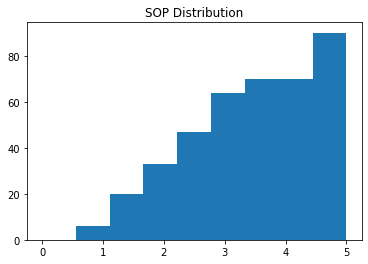

In [ ]:
bins = np.linspace(0, 5, 10)

pyplot.hist(df['SOP'], bins)
pyplot.title("SOP Distribution")
pyplot.show()

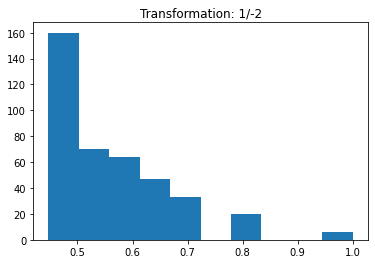

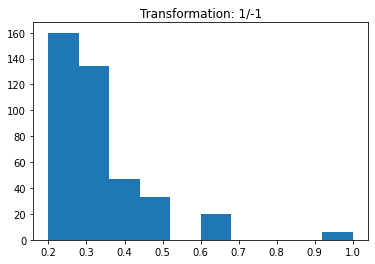

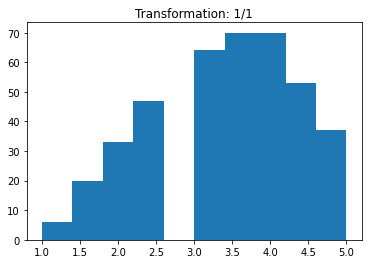

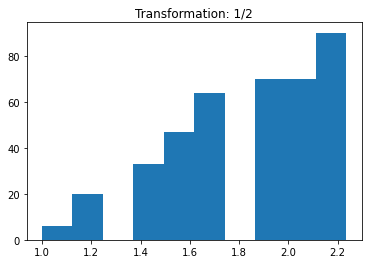

In [ ]:
for i in [-2,-1,1,2]:
  pyplot.hist((df['SOP'])**(1/i), bins = 10)
  pyplot.title("Transformation: 1/{}".format(str(i)))
  pyplot.show()

In [ ]:
df_min_max_scaled = df.copy()
  
# apply normalization techniques by Column 1
column = 'SOP'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

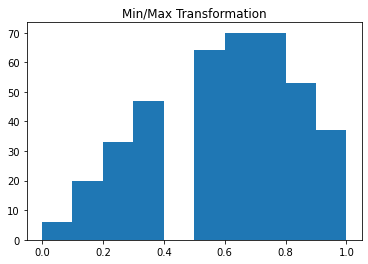

In [ ]:
pyplot.hist(df_min_max_scaled[column], bins = 10)
pyplot.title("Min/Max Transformation")
pyplot.show()

In [ ]:
df = df_min_max_scaled
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Labels
0,337,118,4,0.875,4.5,9.65,1,1
1,324,107,4,0.750,4.5,8.87,1,1
2,316,104,3,0.500,3.5,8.00,1,1
3,322,110,3,0.625,2.5,8.67,1,1
4,314,103,2,0.250,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
395,324,110,3,0.625,3.5,9.04,1,1
396,325,107,3,0.500,3.5,9.11,1,1
397,330,116,4,1.000,4.5,9.45,1,1
398,312,103,3,0.625,4.0,8.78,0,1


In [ ]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150,200], 
    'max_depth': [5,10, 20, 30],
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(x_features, df['Labels'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.304529,0.010628,0.003337,0.000044,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.9000,0.9250,0.9500,0.9500,0.8875,0.9225,0.025495,1
0,0.209351,0.013804,0.004471,0.002478,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.9125,0.9250,0.9500,0.9500,0.8625,0.9200,0.032210,2
2,0.404362,0.007510,0.003519,0.000077,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.8875,0.9250,0.9375,0.9375,0.8875,0.9150,0.022913,3
4,0.328911,0.025772,0.003174,0.000022,10,150,"{'max_depth': 10, 'n_estimators': 150}",0.9000,0.9125,0.9125,0.9125,0.9000,0.9075,0.006124,4
3,0.218726,0.021987,0.003080,0.000070,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.8875,0.9125,0.9125,0.9125,0.9000,0.9050,0.010000,5


In [ ]:
from re import X
x_features = df.drop("Labels", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_features, df['Labels'], test_size=0.2)

In [ ]:
gb = GradientBoostingClassifier()
k_fold = KFold(n_splits=5)
print("Accuracy: ", cross_val_score(rf, x_features, df['Labels'], cv=k_fold, scoring='accuracy', n_jobs=-1))
print("Precision: ", cross_val_score(rf, x_features, df['Labels'], cv=k_fold, scoring='precision', n_jobs=-1))
print("Recall: ", cross_val_score(rf, x_features, df['Labels'], cv=k_fold, scoring='recall', n_jobs=-1))

Accuracy:  [0.85   0.9    0.9625 0.9875 0.8875]
Precision:  [0.86842105 0.91139241 1.         1.         0.91891892]
Recall:  [0.98507463 1.         0.9625     0.98734177 0.97101449]


In [ ]:
gb = RandomForestClassifier()
k_fold = KFold(n_splits=5)
print("Accuracy: ", cross_val_score(rf, x_features, df['Labels'], cv=k_fold, scoring='accuracy', n_jobs=-1))
print("Precision: ", cross_val_score(rf, x_features, df['Labels'], cv=k_fold, scoring='precision', n_jobs=-1))
print("Recall: ", cross_val_score(rf, x_features, df['Labels'], cv=k_fold, scoring='recall', n_jobs=-1))

Accuracy:  [0.8875 0.9    0.9625 0.9875 0.8875]
Precision:  [0.88       0.9        1.         1.         0.91780822]
Recall:  [1.         1.         0.95       0.98734177 0.98550725]


In [ ]:
#is it possible to fix this?
from sklearn import datasets, linear_model
regr = linear_model.LogisticRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label=0, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
      precision, recall, 
      (y_pred==y_test).sum()/len(y_pred)))

Precision: 0.0 / Recall: 0.0 / Accuracy: 0.9


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

precision, recall, fscore, support = score(y_test, y_pred, pos_label = 0, average = 'binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(
      precision * 100, recall * 100, 
      (y_pred==y_test).sum()/len(y_pred)))

<class 'numpy.ndarray'>
Precision: 42.857142857142854 / Recall: 50.0 / Accuracy: 0.9125


In [ ]:
numeric_features = x_train
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

In [ ]:
#Neural network
# model = Sequential()
# model.add(keras.Input(shape=(8,), sparse=False)) 
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid', name='output'))
model = tf.keras.models.Sequential([
    normalizer,
  tf.keras.layers.Flatten(input_shape=(320, 7)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation = 'relu'),
  tf.keras.layers.Dense(8, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')
])

In [ ]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                15        
 n)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 7)                 0         
                                                                 
 dense_9 (Dense)             (None, 128)               1024      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 8)                 520       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(numeric_features, y_train, epochs=5, batch_size=2)

Epoch 1/5
160/160 [==============================] - 1s 3ms/step - loss: 0.1384 - accuracy: 0.9531
Epoch 2/5
160/160 [==============================] - 1s 4ms/step - loss: 0.1297 - accuracy: 0.9563
Epoch 3/5
160/160 [==============================] - 1s 4ms/step - loss: 0.1186 - accuracy: 0.9531
Epoch 4/5
160/160 [==============================] - 1s 3ms/step - loss: 0.1189 - accuracy: 0.9656
Epoch 5/5
160/160 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9563


In [ ]:
results = model.predict(x_test)
for i in range(len(results)):
  if results[i] >= 0.5:
    results[i] = 1
  else:
    results[i] = 0
final_result = []
for el in results:
  final_result.append(el[0])
final_result = np.array(final_result)


3/3 [==============================] - 0s 3ms/step


array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
print('Accuracy: {}'.format(
      (final_result==y_test).sum()/len(y_pred)))

Accuracy: 0.8625
